In [2]:
from typing import TypedDict, Literal

class AgentState(TypedDict):
    amount_usd: float
    total_usd: float
    total_pkr:float
    target_currency:Literal['eur','pkr']

In [3]:
def cal_total(state : AgentState) -> AgentState:
    state['amount_usd']=state['amount_usd']*1.08
    return state

def convert_to_pkr(state : AgentState) -> AgentState:
    state['amount_usd']=state['amount_usd']*220
    return state

def convert_to_eur(state : AgentState) -> AgentState:
    state['amount_usd']=state['amount_usd']*0.85
    return state

def choose_currency(state : AgentState) -> str:
    return state['target_currency']

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(AgentState)

builder.add_node("cal_total", cal_total)
builder.add_node("convert_to_pkr", convert_to_pkr)
builder.add_node("convert_to_eur", convert_to_eur)

builder.add_edge(START, "cal_total")
builder.add_conditional_edges("cal_total", choose_currency, {
    "pkr":"convert_to_pkr",
    "eur":"convert_to_eur"
})
builder.add_edge(["convert_to_pkr", "convert_to_eur"], END)

graph=builder.compile()


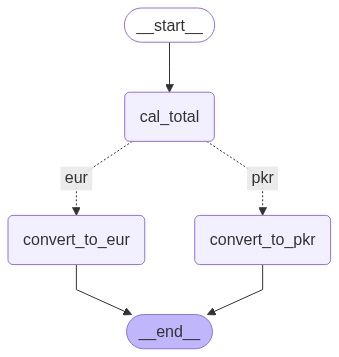

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({"amount_usd": 100, "target_currency": "pkr"})

{'amount_usd': 23760.0, 'target_currency': 'pkr'}